# Quartiers politique de la ville

In [1]:
from dgfip.read import get_qpv, get_dep
import pandas as pd
qpv = get_qpv(compute_distance=True)
dep = get_dep()

In [2]:
qpv.head(3)

,CODE_QP,NOM_QP,COMMUNE_QP,geometry,distance Buralistes,intersect Buralistes,distance Centre de Finances publiques,intersect Centre de Finances publiques,distance France Services,intersect France Services,distance Permanences finances publiques,intersect Permanences finances publiques,distance non Buralistes,intersect non Buralistes
0,QP044012,Le Ranzay,Nantes,"POLYGON ((357455.157 6692832.812, 357455.351 6...",0.324553,False,2.717901,False,4.500712,False,25.056348,False,2.717901,False
1,QP033010,Grand-Parc,Bordeaux,"POLYGON ((416890.442 6423848.428, 416894.521 6...",0.000000,True,1.824637,False,3.251293,False,79.473430,False,1.824637,False
2,QP066007,Bas-Vernet Nouveau QPV,Perpignan,"POLYGON ((691840.400 6178736.600, 691835.200 6...",0.005110,False,0.307418,False,1.026330,False,74.420676,False,0.307418,False


Text(0.5, 1.0, 'Distance des quartiers politique de la ville \n au centre des finances publiques le plus proche')

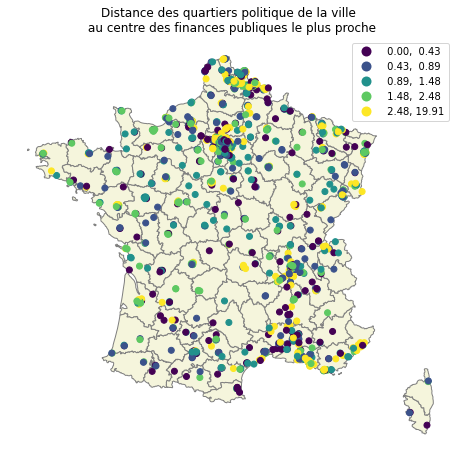

In [6]:
qpv_points = qpv.set_geometry(qpv.centroid)
ax = dep.to_crs('2154').plot(facecolor='beige', edgecolor='grey', figsize=(8,8))
qpv_points.plot(column = 'distance Centre de Finances publiques', scheme='Quantiles', legend=True, ax=ax)
ax.set_axis_off()
ax.set_title('Distance des quartiers politique de la ville \n au centre des finances publiques le plus proche')

In [3]:
long_qpv = pd.melt(qpv, value_vars=[col for col in qpv.columns if col.startswith('distance')], id_vars = 'CODE_QP', var_name='type', value_name='distance')

In [9]:
data =qpv[['CODE_QP','geometry', 'NOM_QP', 'COMMUNE_QP']].merge(long_qpv)

In [10]:
data = data.set_geometry(data.centroid).to_crs('4326')

In [11]:
data['service'] = data['type'].str.replace('distance ','')
data = data.drop(columns='type')

In [12]:
data.to_file('../data/qpv.geojson', driver="GeoJSON")

/home/titouan/projects/OptimisationFiscale/.venv/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


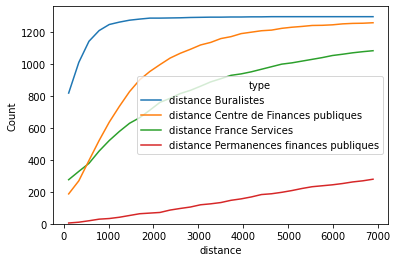

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.histplot(long_qpv[long_qpv['distance'].le(7000)], x='distance', hue='type', cumulative=True, stat='count', fill=False, element="poly", common_norm=False)

In [14]:
from dgfip.optimloc import relocate
relocate(save=True)

/home/titouan/projects/OptimisationFiscale/.venv/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,categorie,geometry
0,P17_POP,POINT (-3.02371 48.44771)
1,P17_POP,POINT (-1.66715 48.10965)
2,P17_POP,POINT (-4.48824 48.39215)
3,P17_POP,POINT (-3.01282 47.64750)
4,P17_POP,POINT (-2.02633 48.61852)
...,...,...
275,initial,POINT (-3.83127 47.95937)
276,initial,POINT (-3.55306 47.87552)
277,initial,POINT (-1.69358 48.03826)
278,initial,POINT (-1.99229 48.63976)
